# Part 1: Understanding the global bitcoin market

Objective: Determine using evidence from bitcoin trading how the world adapted to bitcoin since it started trading and more specifically whether Kenyans responded to bitcoin merely in light of its bullish character. 

***Data:***
* DatetimeIndex e.g. 2011-09-13 to 2019-02-21

*** Data columns :***
* Open                  - float64
* High                  - float64
* Low                   - float64
* Close                 - float64
* Volume (BTC)          - float64
* Volume (Currency)     - float64
* Weighted Price        - float64
* LOCALBTC              - int64
* PAXFUL                - float64


***Getting our toolkit ready***

We can anticipate the data to be analysed will be in various formats e.g numbers and dates and we can get some of the imports at the onset. We are going to analyse and visualize the data to derive insights.

In [1]:
import os
import numpy as np
import pandas as pd 
import pickle
import quandl
from datetime import datetime

In [2]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

***Acquiring our data***

We can start by first getting a comprehensive data set from the quandl API. We'll serialize and store this data as a pickle file to avoid duplication because we are accessing the data through an API.

Quandl is a credible source because it pulls data from over 60 Bitcoin exchanges/marketplaces and in over 33 currencies. Our analysis will focus on bitcoin exchange value to the USD.

By convention the Quandl data follows this orientation: BCHARTS/{MARKET}{CURRENCY} 

In [3]:
#function that retrieves the data from quandl
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

***Let us then explore the quandl data slicing it into some specific common exchanges such as Bitstamp, Kraken,LocalBTC etc. *** 

In [4]:
# Pull Bitstamp BTC price exchange data
btc_usd_bitstamp = get_quandl_data('BCHARTS/BITSTAMPUSD')


Loaded BCHARTS/BITSTAMPUSD from cache


In [5]:
btc_usd_bitstamp.tail()

Open     High      Low    Close  Volume (BTC)  \
Date                                                           
2019-02-17  3580.43  3663.34  3553.98  3625.60   5012.461275   
2019-02-18  3625.60  3916.47  3614.82  3869.80  15567.084854   
2019-02-19  3870.97  4000.00  3840.08  3888.46  12525.136510   
2019-02-20  3889.92  3967.52  3861.49  3936.53   9854.354939   
2019-02-21  3936.80  3936.80  3936.53  3936.70      0.949103   

            Volume (Currency)  Weighted Price  
Date                                           
2019-02-17       1.801128e+07     3593.299836  
2019-02-18       5.867456e+07     3769.142295  
2019-02-19       4.891041e+07     3904.980048  
2019-02-20       3.856174e+07     3913.167856  
2019-02-21       3.736376e+03     3936.745708

In [6]:
btc_usd_bitstamp.head()
#our data collected from bitstamp is from 2011 up until 2019

Open  High   Low  Close  Volume (BTC)  Volume (Currency)  \
Date                                                                   
2011-09-13  5.80  6.00  5.65   5.97     58.371382         346.097389   
2011-09-14  5.58  5.72  5.52   5.53     61.145984         341.854813   
2011-09-15  5.12  5.24  5.00   5.13     80.140795         408.259002   
2011-09-16  4.82  4.87  4.80   4.85     39.914007         193.763147   
2011-09-17  4.87  4.87  4.87   4.87      0.300000           1.461000   

            Weighted Price  
Date                        
2011-09-13        5.929231  
2011-09-14        5.590798  
2011-09-15        5.094272  
2011-09-16        4.854515  
2011-09-17        4.870000

In [7]:
# Pull Kraken BTC price exchange data
btc_usd_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

Loaded BCHARTS/KRAKENUSD from cache


In [8]:
btc_usd_kraken.tail()

Open    High     Low   Close  Volume (BTC)  Volume (Currency)  \
Date                                                                          
2019-02-17  3580.4  3675.0  3552.7  3625.1   3861.961078       1.388849e+07   
2019-02-18  3625.7  3926.0  3617.0  3870.7  11387.816221       4.299460e+07   
2019-02-19  3870.1  3975.0  3838.2  3888.1   7737.012414       3.026777e+07   
2019-02-20  3888.5  3962.5  3865.7  3942.0   5841.967019       2.288085e+07   
2019-02-21  3938.6  3941.0  3935.1  3941.0     14.995323       5.904148e+04   

            Weighted Price  
Date                        
2019-02-17     3596.226171  
2019-02-18     3775.490877  
2019-02-19     3912.074615  
2019-02-20     3916.634131  
2019-02-21     3937.326283

In [9]:
btc_usd_kraken.head()
#our data collected from kraken is from 2014 up until 2019

Open       High        Low      Close  Volume (BTC)  \
Date                                                                   
2014-01-07  874.67040  892.06753  810.00000  810.00000     15.622378   
2014-01-08  810.00000  899.84281  788.00000  824.98287     19.182756   
2014-01-09  825.56345  870.00000  807.42084  841.86934      8.158335   
2014-01-10  839.99000  857.34056  817.00000  857.33056      8.024510   
2014-01-11  858.20000  918.05471  857.16554  899.84105     18.748285   

            Volume (Currency)  Weighted Price  
Date                                           
2014-01-07       13151.472844      841.835522  
2014-01-08       16097.329584      839.156269  
2014-01-09        6784.249982      831.572913  
2014-01-10        6780.220188      844.938794  
2014-01-11       16698.566929      890.671709

In [10]:
btc_usd_localbtc = get_quandl_data('BCHARTS/LOCALBTCUSD')

Loaded BCHARTS/LOCALBTCUSD from cache


In [11]:
# Pull Kraken BTC price exchange data
btc_usd_localbtc.tail()

Open      High      Low    Close  Volume (BTC)  \
Date                                                            
2019-01-04  4160.00  17765.86  3039.91  4253.74    263.157473   
2019-01-05  4193.63  49922.62  3103.20  5656.52    133.922824   
2019-01-06  5060.00  45000.45  3230.35  6065.13     65.011512   
2019-01-07  4400.00  29961.20  3033.37  7982.54    197.037982   
2019-01-08  4800.00   8957.02  3383.77  4170.85     42.374370   

            Volume (Currency)  Weighted Price  
Date                                           
2019-01-04       1.069146e+06     4062.761232  
2019-01-05       5.726714e+05     4276.129869  
2019-01-06       2.889551e+05     4444.675714  
2019-01-07       8.510588e+05     4319.262715  
2019-01-08       1.848791e+05     4362.992784

In [12]:
btc_usd_localbtc.head()
#our data collected from localbtc is from 2013 up until 2019

Open   High    Low  Close  Volume (BTC)  Volume (Currency)  \
Date                                                                      
2013-03-11  72.00  72.00  72.00  72.00        4.9999         359.992800   
2013-03-12  67.79  67.79  67.79  67.79        1.9999         135.573221   
2013-03-13  52.21  56.29  40.00  40.00       17.1585         877.089393   
2013-03-14  70.30  70.30  50.35  50.35        6.8646         375.008903   
2013-03-15  49.52  70.96  47.75  48.41       62.4884        3111.258621   

            Weighted Price  
Date                        
2013-03-11       72.000000  
2013-03-12       67.790000  
2013-03-13       51.116904  
2013-03-14       54.629389  
2013-03-15       49.789379

***we can then briefly view what our already imported data frames look like using describe and info methods***

In [13]:
btc_usd_bitstamp.describe()

#BTC on Bitstamp weighted mean price was 1,815 USD, and maxed at 19,110 USD from a minimum of cents.

Open          High           Low         Close   Volume (BTC)  \
count   2719.000000   2719.000000   2719.000000   2719.000000    2719.000000   
mean    1820.551545   1880.779551   1749.319007   1822.079338    9975.565972   
std     3108.501389   3228.239326   2955.815085   3108.615634   10860.128212   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%      117.390000    119.805000    111.015000    117.565000    3297.097059   
50%      434.870000    443.980000    425.670000    435.230000    7169.893231   
75%     1232.855000   1250.670000   1204.830000   1233.695000   13253.829965   
max    19187.780000  19666.000000  18465.000000  19187.780000  137070.178338   

       Volume (Currency)  Weighted Price  
count       2.719000e+03     2719.000000  
mean        2.228994e+07     1815.648402  
std         5.116327e+07     3091.996083  
min         0.000000e+00        0.000000  
25%         9.009212e+05      117.185826  
50%         3.372160e+06      435.606483  
75%         1.754460e+07     1231.885024  
max         7.721430e+08    19110.244062

In [14]:
btc_usd_bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2719 entries, 2011-09-13 to 2019-02-21
Data columns (total 7 columns):
Open                 2719 non-null float64
High                 2719 non-null float64
Low                  2719 non-null float64
Close                2719 non-null float64
Volume (BTC)         2719 non-null float64
Volume (Currency)    2719 non-null float64
Weighted Price       2719 non-null float64
dtypes: float64(7)
memory usage: 169.9 KB


In [15]:
btc_usd_kraken.describe()

#BTC on Kraken weighted mean price was 2,586 USD, and maxed at 19,135 USD from a minimum of cents.

Open          High           Low         Close  Volume (BTC)  \
count   1872.000000   1872.000000   1872.000000   1872.000000   1872.000000   
mean    2591.619173   2679.725287   2493.313922   2592.900984   2600.354141   
std     3477.738955   3619.985314   3307.560596   3476.769725   3702.838225   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      389.127535    394.897492    374.185007    385.007510     24.692998   
50%      653.568790    668.631430    638.375000    654.256335    966.837514   
75%     3933.800000   4113.225000   3776.150000   3940.400000   3998.427855   
max    19356.900000  19660.000000  18567.100000  19356.900000  28799.360110   

       Volume (Currency)  Weighted Price  
count       1.872000e+03     1872.000000  
mean        1.343560e+07     2586.266283  
std         2.502714e+07     3462.053016  
min         0.000000e+00        0.000000  
25%         8.947430e+03      388.111490  
50%         5.871459e+05      652.075580  
75%         1.852187e+07     3946.942081  
max         1.951897e+08    19135.469160

In [16]:
btc_usd_kraken.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1872 entries, 2014-01-07 to 2019-02-21
Data columns (total 7 columns):
Open                 1872 non-null float64
High                 1872 non-null float64
Low                  1872 non-null float64
Close                1872 non-null float64
Volume (BTC)         1872 non-null float64
Volume (Currency)    1872 non-null float64
Weighted Price       1872 non-null float64
dtypes: float64(7)
memory usage: 117.0 KB


In [17]:
#let us check for missing values if any

print(btc_usd_bitstamp.isnull().any())
print(btc_usd_kraken.isnull().any())
print(btc_usd_localbtc.isnull().any())

Open                 False
High                 False
Low                  False
Close                False
Volume (BTC)         False
Volume (Currency)    False
Weighted Price       False
dtype: bool
Open                 False
High                 False
Low                  False
Close                False
Volume (BTC)         False
Volume (Currency)    False
Weighted Price       False
dtype: bool
Open                 False
High                 False
Low                  False
Close                False
Volume (BTC)         False
Volume (Currency)    False
Weighted Price       False
dtype: bool


***we can generally see that our data is clean and has no missing values. Going forward then we need to simply test for visualization then merge data from all exchanges to derive insights for Part 1***.

In [18]:
#let us have a visual perspective of BTC prices in USD from Bitstamp

In [19]:
btc_chart_bitstamp = go.Scatter(x=btc_usd_bitstamp.index, y=btc_usd_bitstamp['Weighted Price'])
py.iplot([btc_chart_bitstamp])

***We can observe bitcoin's meteoric price rise between 2017 and 2018. At a later date, I may want to investigate what specifically led to this spike. Perhaps it was a steep rise in buyers fueled by media reporting of bitcoin. Perharps it was the entry of bul purchases whose high trading volumes led to the spike. Perhaps it was global political instability or currency crises driving people to seek alternative forms of wealth preservation. Perhaps it was a mix of all of these and many more factors.***

In [20]:
print(btc_usd_bitstamp['Weighted Price'].idxmin())
print(btc_usd_kraken['Weighted Price'].idxmin())
print(btc_usd_localbtc['Weighted Price'].idxmin())

2011-09-30 00:00:00
2014-05-19 00:00:00
2014-05-18 00:00:00


In [21]:
#when exactly did bitcoin peak across our sample exchanges

print(btc_usd_bitstamp['Weighted Price'].idxmax())
print(btc_usd_kraken['Weighted Price'].idxmax())
print(btc_usd_localbtc['Weighted Price'].idxmax())

2017-12-17 00:00:00
2017-12-17 00:00:00
2017-10-10 00:00:00


In [22]:
#what was the peak price across our sample exchanges

print(btc_usd_bitstamp['Weighted Price'].max())
print(btc_usd_kraken['Weighted Price'].max())
print(btc_usd_localbtc['Weighted Price'].max())

#there is definitely an anomaly with localbtc peak price because bitcoin price has never really gotten to 11 million USD!!!

19110.24406186
19135.469160121
11232653.9514


In [23]:
print(btc_usd_localbtc.loc['2017-10-10'])

Open                 5.329640e+03
High                 4.836901e+10
Low                  3.421600e+03
Close                7.950000e+03
Volume (BTC)         3.583411e+02
Volume (Currency)    4.025122e+09
Weighted Price       1.123265e+07
Name: 2017-10-10 00:00:00, dtype: float64


## Bringing it all together - Merging data from more exchanges

In [24]:
btc_usd_coinbase = get_quandl_data('BCHARTS/COINBASEUSD')

Loaded BCHARTS/COINBASEUSD from cache


In [25]:
exchanges = 'COINBASE BITSTAMP ITBIT LOCALBTC'.split()

exchange_data = {}

exchange_data['KRAKEN'] = btc_usd_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Loaded BCHARTS/COINBASEUSD from cache
Loaded BCHARTS/BITSTAMPUSD from cache
Loaded BCHARTS/ITBITUSD from cache
Loaded BCHARTS/LOCALBTCUSD from cache


In [26]:
exchange_data.keys()

dict_keys(['KRAKEN', 'COINBASE', 'BITSTAMP', 'ITBIT', 'LOCALBTC'])

### Let us now merge our inidividual exchange dataframes in to one dataframe

In [27]:
def merge_dfs_on_column(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [28]:
# Merge based on the Weighted Price column
btc_usd_merged = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Weighted Price')

In [29]:
btc_usd_merged.tail()

KRAKEN  COINBASE     BITSTAMP  ITBIT  LOCALBTC
Date                                                           
2019-02-17  3596.226171       NaN  3593.299836    NaN       NaN
2019-02-18  3775.490877       NaN  3769.142295    NaN       NaN
2019-02-19  3912.074615       NaN  3904.980048    NaN       NaN
2019-02-20  3916.634131       NaN  3913.167856    NaN       NaN
2019-02-21  3937.326283       NaN  3936.745708    NaN       NaN

In [30]:
btc_usd_merged.head()

#some exchanges do have missing values for certain dates

KRAKEN  COINBASE  BITSTAMP  ITBIT  LOCALBTC
Date                                                   
2011-09-13     NaN       NaN  5.929231    NaN       NaN
2011-09-14     NaN       NaN  5.590798    NaN       NaN
2011-09-15     NaN       NaN  5.094272    NaN       NaN
2011-09-16     NaN       NaN  4.854515    NaN       NaN
2011-09-17     NaN       NaN  4.870000    NaN       NaN

In [31]:
print(btc_usd_merged.max())

KRAKEN      1.913547e+04
COINBASE    1.945563e+04
BITSTAMP    1.911024e+04
ITBIT       1.924728e+04
LOCALBTC    1.123265e+07
dtype: float64


In [32]:
print(btc_usd_merged.idxmax())

#we can further confirm that local btc contains an anomaly that may potential distort out findings

KRAKEN     2017-12-17
COINBASE   2017-12-17
BITSTAMP   2017-12-17
ITBIT      2017-12-17
LOCALBTC   2017-10-10
dtype: datetime64[ns]


In [33]:
#drop local btc from the analysis
btc_usd_merged = btc_usd_merged.drop(['LOCALBTC'], axis=1)
btc_usd_merged.columns

Index(['KRAKEN', 'COINBASE', 'BITSTAMP', 'ITBIT'], dtype='object')

In [34]:
btc_usd_merged.isnull().any()
#Bistamp is our most comprehensive data source

KRAKEN       True
COINBASE     True
BITSTAMP    False
ITBIT        True
dtype: bool

In [35]:
btc_usd_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2719 entries, 2011-09-13 to 2019-02-21
Freq: D
Data columns (total 4 columns):
KRAKEN      1872 non-null float64
COINBASE    1216 non-null float64
BITSTAMP    2719 non-null float64
ITBIT       1980 non-null float64
dtypes: float64(4)
memory usage: 106.2 KB


***heads up plotly 3 may prove to have issues with cufflinks and if that is the case for you as it was for me, I suggest downgrading to plotly 2.7.0[https://stackoverflow.com/questions/51691172/plotly-value-error-invalid-property-for-colour] ***

In [36]:
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible = True
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)

In [37]:
df_scatter(btc_usd_merged, 'Bitcoin Price (USD) By Exchange')

***we can see from this graph our chart has some zero values that distort the true representation. For example it does not make sense for BTC to be exchanging for zero dollars at ITBIT while it is around 3,000 USD on Bitstamp. The solution would thus be to drop all the zero values***

In [38]:
btc_usd_merged.replace(0, np.nan, inplace=True)

In [39]:
#no more zero prices of Bitcoin
btc_usd_merged.min()

KRAKEN      199.628389
COINBASE    213.307686
BITSTAMP      2.240360
ITBIT       105.830000
dtype: float64

In [40]:
df_scatter(btc_usd_merged, 'Bitcoin Price (USD) By Exchange')

***No more zeros!. Much truer representation of the marketplace. But since all the graphs seem aligned we can go ahead and add a new column that gives an average price from all our exchanges and get a simpler graph***

In [41]:
btc_usd_merged['avg_btc_price_usd'.upper()] = btc_usd_merged.mean(axis=1)

In [42]:
btc_usd_merged.head()

KRAKEN  COINBASE  BITSTAMP  ITBIT  AVG_BTC_PRICE_USD
Date                                                            
2011-09-13     NaN       NaN  5.929231    NaN           5.929231
2011-09-14     NaN       NaN  5.590798    NaN           5.590798
2011-09-15     NaN       NaN  5.094272    NaN           5.094272
2011-09-16     NaN       NaN  4.854515    NaN           4.854515
2011-09-17     NaN       NaN  4.870000    NaN           4.870000

In [43]:
#our new clean graph 
btc_overall_chart = go.Scatter(x=btc_usd_merged.index, y=btc_usd_merged['AVG_BTC_PRICE_USD'])
py.iplot([btc_overall_chart], filename='Bitcoin_Price(USD)')

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

***Let us now look at our general trend for BTC price by checking the 30 day Moving Average***

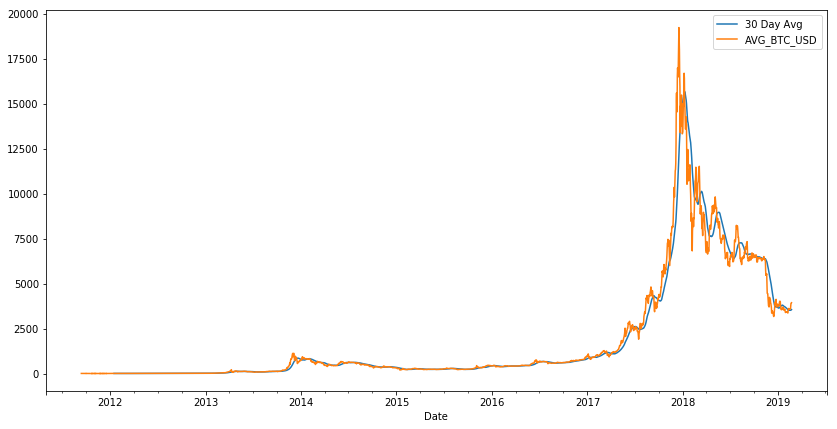

In [45]:
plt.figure(figsize=(14,7))
btc_usd_merged['AVG_BTC_PRICE_USD'].rolling(window=30).mean().plot(label='30 Day Avg')
btc_usd_merged['AVG_BTC_PRICE_USD'].plot(label='AVG_BTC_USD')
plt.legend()

***After Bitcoin peaked at around 19,000 USD, our data shows us that it has been on a downward spiral and the moving average suggests this will go on. However, had you bought Bitcoin at 5 dollars in 2011 and you HOLD'd would your investment have been worth it today? We can generally look at the Compounded Annual Growth Rate to determine the annualized rate of return for yor investment***

In [46]:
btc_usd_merged['AVG_BTC_PRICE_USD'].loc['2019-01-10':'2019-02-17'].mean()

3540.87472797857

# Now lets get Local - Let us see the BTC volumes traded by Kenyans
data source:[https://coin.dance/]
* Coindance captures volumes data from two exchanges LocalBTC & Paxful. This may not be exhaustive but it is sufficient to gives a clear picture. 

In [47]:
path = 'D:\\006_BTC_Analysis\\'

In [48]:
btc_kenya_localbtc = pd.read_excel(path+'coin-dance-localbitcoins-KES-volume.xlsx')

In [49]:
#what does the dataframe look like
btc_kenya_localbtc.head()

Date  Value
0 2013-11-23   4409
1 2013-11-30  10121
2 2013-12-07   1272
3 2013-12-28   3687
4 2014-01-04   2919

In [50]:
#rename the columns
btc_kenya_localbtc.columns = ['Date', 'LocalBTC'.upper()]

In [51]:
btc_kenya_localbtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
Date        272 non-null datetime64[ns]
LOCALBTC    272 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.3 KB


In [52]:
btc_kenya_paxful = pd.read_excel(path+'coin-dance-paxful-KES-volume.xlsx')
btc_kenya_paxful.head(2)

Date  Value
0 2016-05-07  10047
1 2016-05-14  16969

In [53]:
btc_kenya_paxful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
Date     139 non-null datetime64[ns]
Value    139 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 KB


In [54]:
btc_kenya_paxful.columns = ['Date', 'Paxful'.upper()]

In [55]:
#merge the two dataframes
btc_kenya_volumes = pd.merge(btc_kenya_localbtc,btc_kenya_paxful, how = 'outer')
btc_kenya_volumes.head()

Date  LOCALBTC  PAXFUL
0 2013-11-23      4409     NaN
1 2013-11-30     10121     NaN
2 2013-12-07      1272     NaN
3 2013-12-28      3687     NaN
4 2014-01-04      2919     NaN

In [56]:
btc_kenya_volumes.tail(2)

Date  LOCALBTC     PAXFUL
270 2019-02-16  29701339  4679664.0
271 2019-02-23  36178248  3523690.0

In [57]:
btc_kenya_volumes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 271
Data columns (total 3 columns):
Date        272 non-null datetime64[ns]
LOCALBTC    272 non-null int64
PAXFUL      139 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.5 KB


In [58]:
#make sure our date is set as a datatime
btc_kenya_volumes['Date'] = pd.to_datetime(btc_kenya_volumes['Date'], format='%Y%m%d')
btc_kenya_volumes.head(2)

Date  LOCALBTC  PAXFUL
0 2013-11-23      4409     NaN
1 2013-11-30     10121     NaN

In [59]:
#set the date as the index for the table
btc_kenya_volumes = btc_kenya_volumes.set_index('Date')

In [60]:
#replace all null values with a zero. We are not using any averages so this won't affect any calculations going forward
btc_kenya_volumes = btc_kenya_volumes.fillna(0)

In [61]:
btc_kenya_volumes.tail()

LOCALBTC     PAXFUL
Date                           
2019-01-26  29606217  2844966.0
2019-02-02  40647084  3067370.0
2019-02-09  41174961  3850570.0
2019-02-16  29701339  4679664.0
2019-02-23  36178248  3523690.0

In [62]:
#add a new column that captures the total volumes traded on both exchanges
btc_kenya_volumes['total_volumes'.upper()] = btc_kenya_volumes['LOCALBTC']+btc_kenya_volumes['PAXFUL']

In [63]:
btc_kenya_volumes.tail()

LOCALBTC     PAXFUL  TOTAL_VOLUMES
Date                                          
2019-01-26  29606217  2844966.0     32451183.0
2019-02-02  40647084  3067370.0     43714454.0
2019-02-09  41174961  3850570.0     45025531.0
2019-02-16  29701339  4679664.0     34381003.0
2019-02-23  36178248  3523690.0     39701938.0

In [64]:
#when do we observe the minimum volumes traded
btc_kenya_volumes.idxmin()

LOCALBTC        2014-10-11
PAXFUL          2013-11-23
TOTAL_VOLUMES   2014-10-11
dtype: datetime64[ns]

In [65]:
#when do we observe the maximum volumes traded
btc_kenya_volumes.idxmax()

LOCALBTC        2017-12-09
PAXFUL          2018-02-24
TOTAL_VOLUMES   2017-12-09
dtype: datetime64[ns]

In [66]:
btc_kenya_volumes['TOTAL_VOLUMES'].idxmax()

Timestamp('2017-12-09 00:00:00')

In [67]:
#total traded volumes on LocalBTC
btc_kenya_volumes['LOCALBTC'].sum()

3767957659

In [68]:
#total traded volumes on paxful
btc_kenya_volumes['PAXFUL'].sum()

193143869.0

In [69]:
#total BTC traded volumes by Kenyans
btc_kenya_volumes['TOTAL_VOLUMES'].sum()

3961101528.0

In [70]:
#what was the highest cumulative volumes traded in a day
btc_kenya_volumes['TOTAL_VOLUMES'].max()

86907592.0

In [71]:
btc_kenya_volumes['TOTAL_VOLUMES'].min()

0.0

In [72]:
#the day we observed the highest volumes traded
btc_kenya_volumes['TOTAL_VOLUMES'].loc['2017-12-09']

86907592.0

In [73]:
#visual cue of volumes traded
volumes_chart = go.Bar(x=btc_kenya_volumes.index, y=btc_kenya_volumes['TOTAL_VOLUMES'])
py.iplot([volumes_chart], filename='Total_Volumes_Traded(KShs.)')

** Now let us compare the Bitcoin trading activity of Kenyans vs how Bitcoin exchange price has changed over time **
* Assumed exchange rate 1 USD = 100 KShs

In [74]:
#lets bring the pricing and volumes tables together and drop any unnecessary columns
a = pd.merge(btc_usd_merged,btc_kenya_volumes, on = 'Date', how = 'outer')
a.tail()

KRAKEN  COINBASE     BITSTAMP  ITBIT  AVG_BTC_PRICE_USD  \
Date                                                                       
2019-02-18  3775.490877       NaN  3769.142295    NaN        3772.316586   
2019-02-19  3912.074615       NaN  3904.980048    NaN        3908.527332   
2019-02-20  3916.634131       NaN  3913.167856    NaN        3914.900994   
2019-02-21  3937.326283       NaN  3936.745708    NaN        3937.035995   
2019-02-23          NaN       NaN          NaN    NaN                NaN   

              LOCALBTC     PAXFUL  TOTAL_VOLUMES  
Date                                              
2019-02-18         NaN        NaN            NaN  
2019-02-19         NaN        NaN            NaN  
2019-02-20         NaN        NaN            NaN  
2019-02-21         NaN        NaN            NaN  
2019-02-23  36178248.0  3523690.0     39701938.0

In [75]:
a = a.drop(['KRAKEN','COINBASE', 'BITSTAMP', 'ITBIT', 'LOCALBTC', 'PAXFUL'],axis=1)

In [76]:
#here's how our new table looks like
a.head()

AVG_BTC_PRICE_USD  TOTAL_VOLUMES
Date                                        
2011-09-13           5.929231            NaN
2011-09-14           5.590798            NaN
2011-09-15           5.094272            NaN
2011-09-16           4.854515            NaN
2011-09-17           4.870000            NaN

* There is a mismatch in our table. BTC price is in USD and Volumes traded is in KShs. We don't want to compare oranges for apples. So we'll have to convert BTC exchange price to kenyan shilling

In [77]:
a['AVG_BTC_PRICE_KShs.'] = a['AVG_BTC_PRICE_USD']*100

In [78]:
a.tail()

AVG_BTC_PRICE_USD  TOTAL_VOLUMES  AVG_BTC_PRICE_KShs.
Date                                                             
2019-02-18        3772.316586            NaN        377231.658597
2019-02-19        3908.527332            NaN        390852.733186
2019-02-20        3914.900994            NaN        391490.099370
2019-02-21        3937.035995            NaN        393703.599525
2019-02-23                NaN     39701938.0                  NaN

In [79]:
#the usd pricing column does not add value anymore so we drop it
a = a.drop(['AVG_BTC_PRICE_USD'], axis=1)

In [80]:
a.head()

TOTAL_VOLUMES  AVG_BTC_PRICE_KShs.
Date                                          
2011-09-13            NaN           592.923065
2011-09-14            NaN           559.079751
2011-09-15            NaN           509.427191
2011-09-16            NaN           485.451505
2011-09-17            NaN           487.000000

In [81]:
#we can replace the null values with zeros
a = a.fillna(0)

In [82]:
a.tail()

TOTAL_VOLUMES  AVG_BTC_PRICE_KShs.
Date                                          
2019-02-18            0.0        377231.658597
2019-02-19            0.0        390852.733186
2019-02-20            0.0        391490.099370
2019-02-21            0.0        393703.599525
2019-02-23     39701938.0             0.000000

In [83]:
from plotly import tools

trace1 = go.Scatter(
    x=a.index,
    y=a['AVG_BTC_PRICE_KShs.'],
    name = 'BTC_Price_KShs'
)
trace2 = go.Bar(
    x=a.index,
    y=a['TOTAL_VOLUMES'],
    name = 'Volumes_Traded_KShs'
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=650, width=850, title='Bitcoin Price vs Volumes Traded in Kenya')
py.iplot(fig, filename='btc_vs_volumes')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [84]:
a.idxmax()

TOTAL_VOLUMES         2017-12-09
AVG_BTC_PRICE_KShs.   2017-12-17
dtype: datetime64[ns]

In [85]:
a.loc['2017-12-09']

TOTAL_VOLUMES          8.690759e+07
AVG_BTC_PRICE_KShs.    1.479860e+06
Name: 2017-12-09 00:00:00, dtype: float64

In [86]:
a.loc['2017-12-17']

TOTAL_VOLUMES          0.000000e+00
AVG_BTC_PRICE_KShs.    1.923715e+06
Name: 2017-12-17 00:00:00, dtype: float64

*** We can compare BTC price vs BTC Volumes peak***

In [87]:
#lets slice our table a to only the period we are concerned with
d = a.loc['2017-01-01':'2019-02-21']

In [88]:
d.head()

TOTAL_VOLUMES  AVG_BTC_PRICE_KShs.
Date                                          
2017-01-01            0.0         98852.454739
2017-01-02            0.0        101496.696478
2017-01-03            0.0        102217.657827
2017-01-04            0.0        109276.112860
2017-01-05            0.0        100466.325580

In [89]:
d.tail()

TOTAL_VOLUMES  AVG_BTC_PRICE_KShs.
Date                                          
2019-02-17            0.0        359476.300371
2019-02-18            0.0        377231.658597
2019-02-19            0.0        390852.733186
2019-02-20            0.0        391490.099370
2019-02-21            0.0        393703.599525

*** Let's get a visual cue for our Peak Bitcoin trading and Peak BTC volumes traded***

In [90]:
trace1 = go.Scatter(
    x=d.index,
    y=d['AVG_BTC_PRICE_KShs.'],
    name = 'BTC_Price_KShs'
)
trace2 = go.Bar(
    x=d.index,
    y=d['TOTAL_VOLUMES'],
    name = 'Volumes_Traded_KShs'
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=650, width=850, title='Peak BTC vs Peak BTC Trading in Kenya')
py.iplot(fig, filename='peak_btc_vs_peak_volumes')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [91]:
#total value of BTC traded
a['TOTAL_VOLUMES'].sum()

3961101528.0

In [92]:
#total value of BTC traded during peak period
d['TOTAL_VOLUMES'].sum()

3577880067.0

In [93]:
#total value of BTC traded since peak BTC
d['TOTAL_VOLUMES'].loc['2017-12-01':].sum()

2590068844.0

In [94]:
#percentage of volumes traded during peak BTC
d['TOTAL_VOLUMES'].loc['2017-12-01':].sum()/a['TOTAL_VOLUMES'].sum()

0.6538759043895933

In [95]:
#total value of BTC traded before peak BTC
d['TOTAL_VOLUMES'].loc[:'2017-12-01'].sum()

987811223.0

* I borrowed some ideas for my work from Patrick Triest whose article you can read here ==>[https://blog.patricktriest.com/analyzing-cryptocurrencies-python/]